# PSTH Heatmap Analysis

This notebook creates heatmaps that combine PSTH data from multiple units.
- **Y-axis**: Units (sorted in ascending order)
- **X-axis**: Time relative to interval start (ms)
- **Color**: Firing rate (Hz)

## Parameters
Configure the analysis parameters in the cell below and run the analysis.

In [ ]:
# Import required modules
import sys
import os
sys.path.append('.')

from heatmap_utils import create_psth_heatmap, create_multiple_duration_heatmaps, plot_summary_statistics
from digitalin_loader import load_digitalin_intervals, validate_intervals_compatibility
import matplotlib.pyplot as plt

# Reload module for development
import importlib
if 'heatmap_utils' in sys.modules:
    importlib.reload(sys.modules['heatmap_utils'])
    from heatmap_utils import create_psth_heatmap, create_multiple_duration_heatmaps, plot_summary_statistics
if 'digitalin_loader' in sys.modules:
    importlib.reload(sys.modules['digitalin_loader'])
    from digitalin_loader import load_digitalin_intervals, validate_intervals_compatibility

In [ ]:
# Configuration Parameters

# Data source selection
use_digitalin = True              # Set to True to use digitalin.dat, False for CSV

# Data files (adjust paths as needed)
if use_digitalin:
    # digitalin.dat loading
    spikes_file = '../../Data/040425/spikes.csv'
    digitalin_file = '../../Data/040425/digitalin.dat'
    intervals_file = None         # Not needed when using digitalin.dat
    sampling_rate = 30000         # Sampling rate for digitalin.dat processing
else:
    # CSV loading (fallback)
    spikes_file = '../../Data/040425/spikes.csv'
    intervals_file = '../../Data/040425/pico_time_adjust.csv'
    digitalin_file = None
    sampling_rate = 30000

# Convert to absolute paths
spikes_path = os.path.abspath(spikes_file) if spikes_file else None
digitalin_path = os.path.abspath(digitalin_file) if digitalin_file else None
intervals_path = os.path.abspath(intervals_file) if intervals_file else None

# Analysis parameters
durations_ms = [5, 10, 25]        # Interval durations to analyze (ms)
units = None                      # Units to include (None = all units)
bin_size_ms = 0.1                 # Bin size in milliseconds
pre_interval_ms = 5               # Time before interval start (ms)
post_interval_ms = 10             # Time after interval start (ms)
smooth_window = 5                 # Smoothing window (bins)

# Output settings
save_plots = True
output_dir = '../../Output/040425/heatmaps'

In [ ]:
# Test digitalin.dat loading (optional)
if use_digitalin and digitalin_path and os.path.exists(digitalin_path):
    print("Testing digitalin.dat loading...")
    
    try:
        intervals_df = load_digitalin_intervals(
            digitalin_filepath=digitalin_path,
            sampling_rate=sampling_rate
        )
        
        print(f"\nSuccessfully loaded {len(intervals_df)} intervals!")
        print("\nFirst few intervals:")
        print(intervals_df.head())
        
        # Validate compatibility
        is_valid = validate_intervals_compatibility(intervals_df)
        print(f"\nCompatibility check: {'✓ PASSED' if is_valid else '✗ FAILED'}")
        
    except Exception as e:
        print(f"Error loading digitalin.dat: {e}")
        print("Please check the file path and ensure digitalin.dat exists.")
        intervals_df = None
        
elif use_digitalin:
    print(f"digitalin.dat file not found: {digitalin_path}")
    print("Please check the file path.")
else:
    print("Using CSV loading mode - skipping digitalin.dat test.")


--- Processing duration: 5ms ---
Loading spike data from: /home/wanglab/spike-analysis/Data/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45)]
Available interval durations (first 5): ['4.93ms', '5.00ms', '5.07ms', '5.13ms', '5.47ms']
Found 12672 intervals with duration 5ms (±

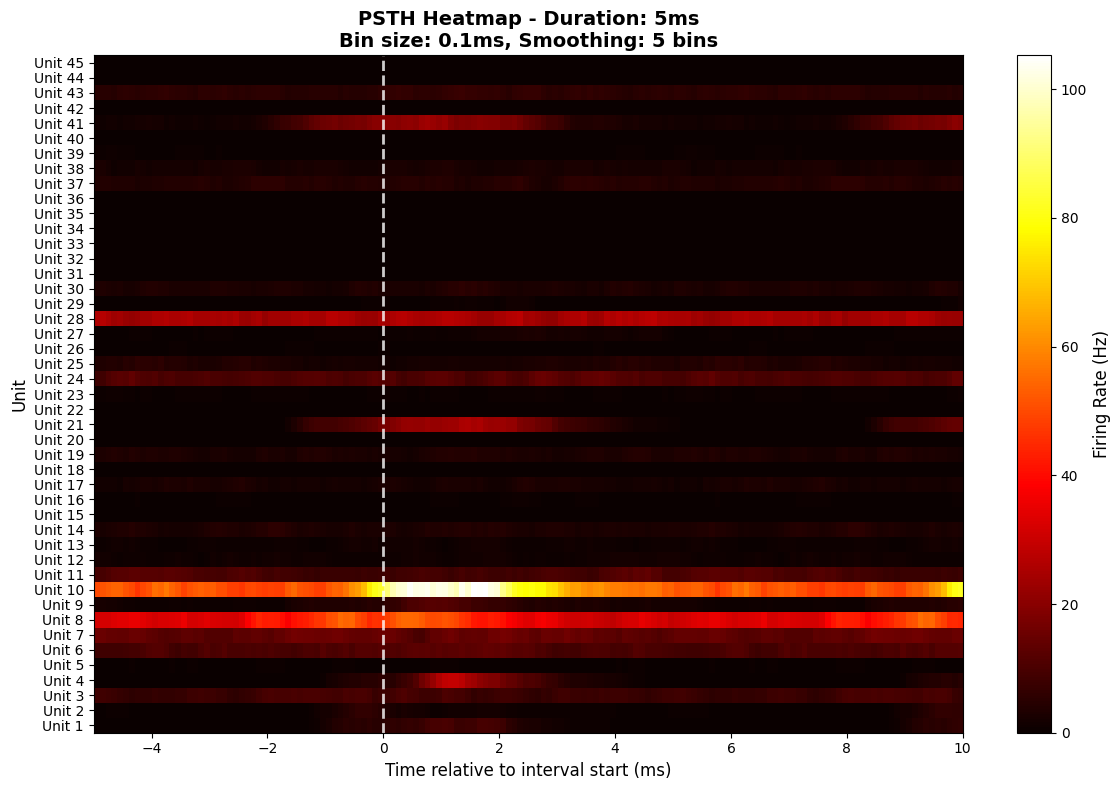

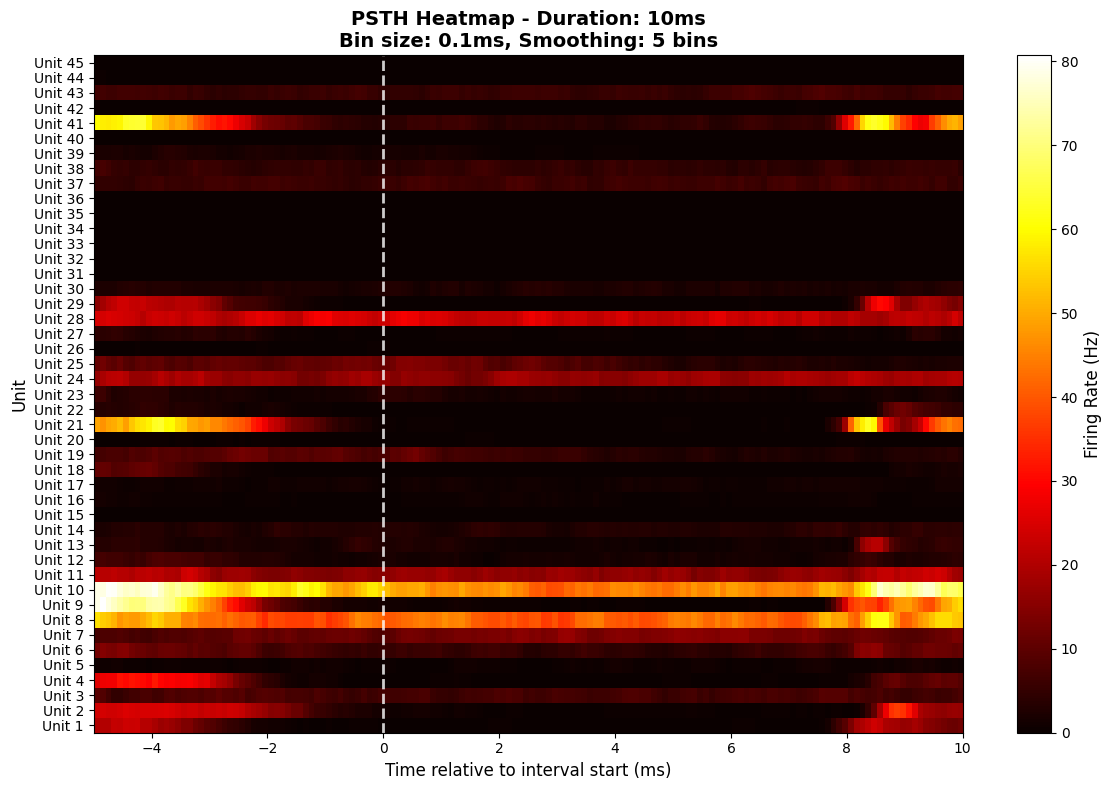

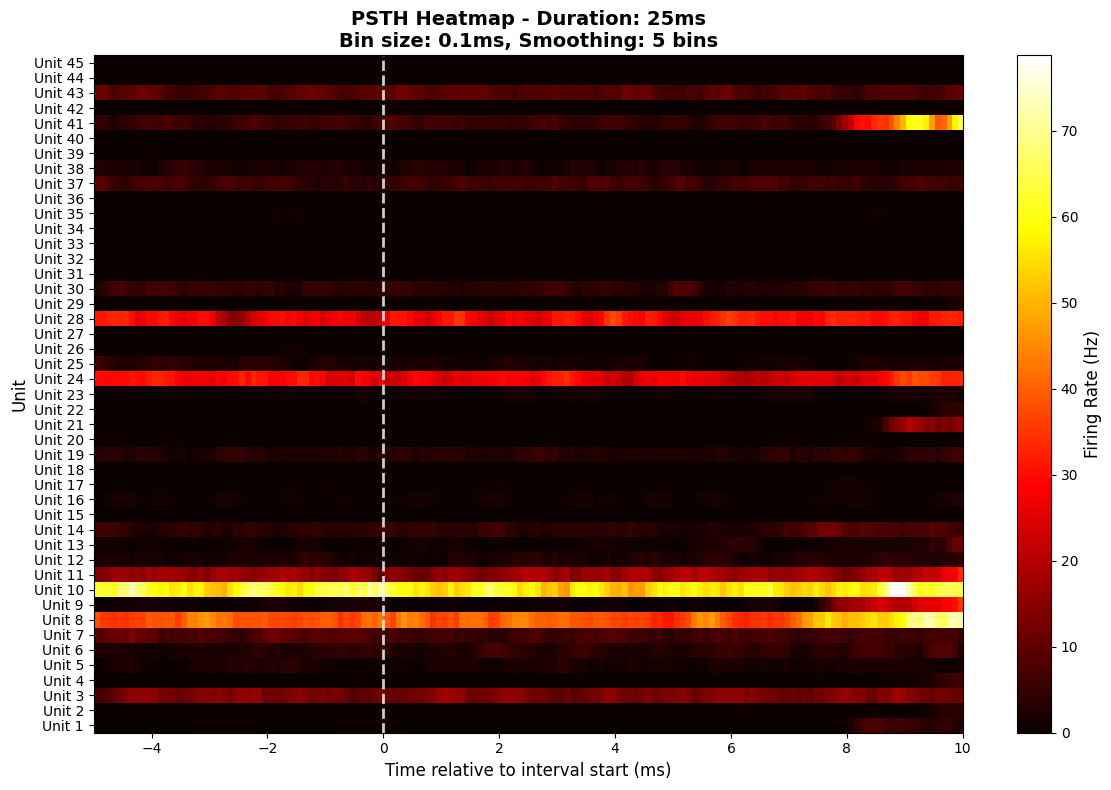

In [ ]:
# Create PSTH heatmaps for all specified durations

save_dir = output_dir if save_plots else None

print("="*60)
print("PSTH HEATMAP ANALYSIS")
print("="*60)
print(f"Data source: {'digitalin.dat' if use_digitalin else 'CSV'}")
if use_digitalin:
    print(f"digitalin.dat file: {digitalin_path}")
    print(f"Sampling rate: {sampling_rate} Hz")
else:
    print(f"Intervals file: {intervals_path}")
print(f"Spikes file: {spikes_path}")
print(f"Durations to analyze: {durations_ms} ms")
print(f"Save plots: {save_plots}")
if save_plots:
    print(f"Output directory: {save_dir}")
print("-"*60)

results = create_multiple_duration_heatmaps(
    spikes_file=spikes_path,
    intervals_file=intervals_path,
    digitalin_file=digitalin_path,
    durations_ms=durations_ms,
    units=units,
    bin_size_ms=bin_size_ms,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    sampling_rate=sampling_rate,
    use_digitalin=use_digitalin,
    save_dir=save_dir
)

print(f"\n{'='*60}")
print(f"Analysis complete! Generated {len(results)} heatmaps!")
if save_plots:
    print(f"Plots saved to: {save_dir}")
print(f"{'='*60}")

# Display plots if not saving to avoid clutter
if not save_plots:
    for duration, (fig, heatmap_data, units_list, time_bins) in results.items():
        if fig is not None:
            plt.show()